In [2]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

# Symbolic Case

You know the formula explicitly 

$$f(x) = ... $$

In this case there are two options

1. The integral can be solved analytically $\int f(x) dx = \text{Something you can write down}$
2. The integral cannot be solved analytically

We can try sympy at first to see if the integral can be solved analytically



## Part 1: "Solvable" Integrals

**Example**: Find $\int \sin^3(x) e^{-5x} dx$

In [31]:
x = smp.symbols('x', real=True)
integrand = smp.sin(x)**3 * smp.exp(-5*x)
integrand

exp(-5*x)*sin(x)**3

In [32]:
smp.integrate(integrand, x)

-40*exp(-5*x)*sin(x)**3/221 - 21*exp(-5*x)*sin(x)**2*cos(x)/221 - 15*exp(-5*x)*sin(x)*cos(x)**2/442 - 3*exp(-5*x)*cos(x)**3/442

**Example**: Find $\int \cos(bx)e^{-ax} dx$

In [34]:
a, b = smp.symbols('a b', positive=True, real=True)
integrand = smp.cos(b*x) * smp.exp(-a*x)
integrand

exp(-a*x)*cos(b*x)

In [36]:
smp.integrate(integrand, x).simplify()

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

**Example**: Find  $\int \frac{(1+\sqrt{x})^{1/3}}{\sqrt{x}} dx$

In [38]:
integrand = (1+smp.sqrt(x))**smp.Rational(1,3)/smp.sqrt(x)
smp.integrate(integrand, x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

**Example** (Definite) Find $\int_{0}^{\ln(4)}\frac{e^x}{\sqrt{e^{2x}+9}} dx$

In [24]:
integrand = smp.exp(x)/smp.sqrt(smp.exp(2*x)+9)
smp.integrate(integrand, (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

**Example** (Improper) Find $ \int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1+x^2} dx $

In [27]:
integrand = 16 * smp.atan(x)/(1+x**2)
smp.integrate(integrand, (x, 0, smp.oo))

2*pi**2

## Part 2: "Unsolvable" Integrals

**Example**: Find $\int_{1}^{2} e^{-\sin(x)} dx$

Won't run

In [40]:
# cant be solved symbolically
# therefore only work for definite integral numerically

So we use scipy's `quad` function to integrate numerically

In [45]:
f = lambda x: np.exp(-np.sin(x))
quad(f, 1, 2)[0]

0.3845918142796868

**Example**: Find $\int_{0}^{2\pi} \frac{1}{(a-\cos(x))^2 + (b-\sin(x))^2} dx$

This won't run as this does not have an analytical solution. We must solve it numerically, and thus we need choose values of $a$ and $b$ each time

In [66]:
f = lambda x: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
a, b = 2, 3
quad(f, 0, 2*np.pi)[0]

0.5235987755982989

In [77]:
f = lambda x, a, b: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
quad(f, 0, 2*np.pi, (2, 3,))

(0.5235987755982989, 1.9168823883823662e-13)

We can solve this for many different values of $a$ and $b$ quickly as follows:

In [94]:
f = lambda x, a, b: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
a_array = np.arange(2, 10, 1)
b_array = np.arange(2, 10, 1)
integrals = [[a, b, quad(f, 0, 2*np.pi, args=(a, b))[0]] for a in a_array for b in b_array]
integrals

[[2, 2, 0.8975979010256552],
 [2, 3, 0.5235987755982989],
 [2, 4, 0.3306939635357684],
 [2, 5, 0.22439947525641385],
 [2, 6, 0.16110731556870733],
 [2, 7, 0.1208304866765305],
 [2, 8, 0.09377888518178487],
 [2, 9, 0.07479982508547126],
 [3, 2, 0.5235987755982988],
 [3, 3, 0.36959913571644665],
 [3, 4, 0.26179938779914935],
 [3, 5, 0.19039955476301776],
 [3, 6, 0.14279966607226333],
 [3, 7, 0.11023132117858925],
 [3, 8, 0.08726646259971647],
 [3, 9, 0.07059758772111896],
 [4, 2, 0.3306939635357676],
 [4, 3, 0.26179938779914946],
 [4, 4, 0.2026833970057931],
 [4, 5, 0.15707963267948966],
 [4, 6, 0.1231997119054821],
 [4, 7, 0.09817477042468103],
 [4, 8, 0.07953399123010797],
 [4, 9, 0.06544984694977965],
 [5, 2, 0.2243994752564138],
 [5, 3, 0.19039955476301776],
 [5, 4, 0.15707963267948966],
 [5, 5, 0.12822827157509362],
 [5, 6, 0.10471975511965978],
 [5, 7, 0.08607103160519981],
 [5, 8, 0.07139983303613168],
 [5, 9, 0.05983986006837441],
 [6, 2, 0.16110731556870733],
 [6, 3, 0.142799666

In [96]:
np.array(integrals).T.shape

(3, 64)

In [89]:
f = lambda x, a, b: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
a_array = np.arange(2, 10, 1)
b_array = np.arange(2, 10, 1)
integrals = sp.integrate.quad_vec(f, 0, 2*np.pi, args=(a_array, b_array))
integrals

(array([0.8975979 , 0.36959914, 0.2026834 , 0.12822827, 0.08849557,
        0.06477511, 0.0494739 , 0.039026  ]),
 4.153228587659499e-11)

In [91]:
np.array(integrals[0]).shape

(8,)

# Numerical Case

This is the case where one collects actual data and wants to find the integral

**Example**: Electric Pulses in particle physics experiments

In [99]:
x, y = np.loadtxt('sample_data3.txt')

Suppose this is current measured $I(t)$

Text(0, 0.5, 'Current $[mA]$')

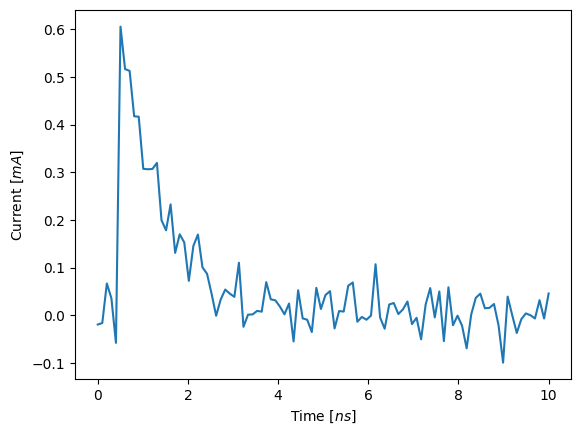

In [103]:
plt.plot(x, y)
plt.xlabel('Time $[ns]$')
plt.ylabel('Current $[mA]$')

Now in some detector experiments, energy is proportional to integrated current so $\text{Energy} \propto \int I(t) dt$

In [101]:
integral = cumulative_trapezoid(y, x, initial=0)

Text(0, 0.5, 'Integrated Current $[pC]$')

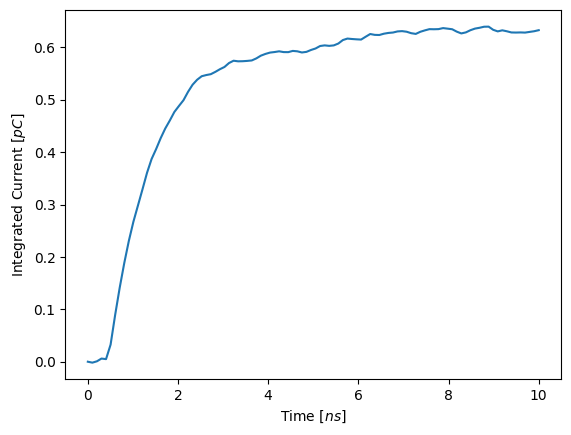

In [105]:
plt.plot(x, integral)
plt.xlabel('Time $[ns]$')
plt.ylabel('Integrated Current $[pC]$')         # integration removed noise

**Example**: Covid Data

In [106]:
x, y = np.loadtxt('coviddata.txt')

Plot cases per day

Text(0, 0.5, 'Cases per Day')

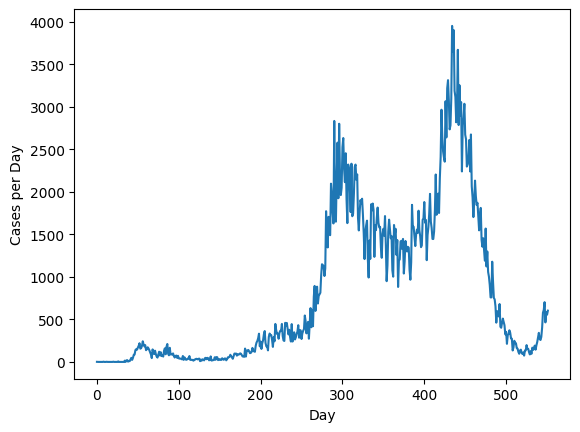

In [108]:
plt.plot(x, y)
plt.xlabel('Day')
plt.ylabel('Cases per Day')

Can find the cumulative number of cases by taking the integral

In [109]:
integral = cumulative_trapezoid(y, x, initial=0)

And plot

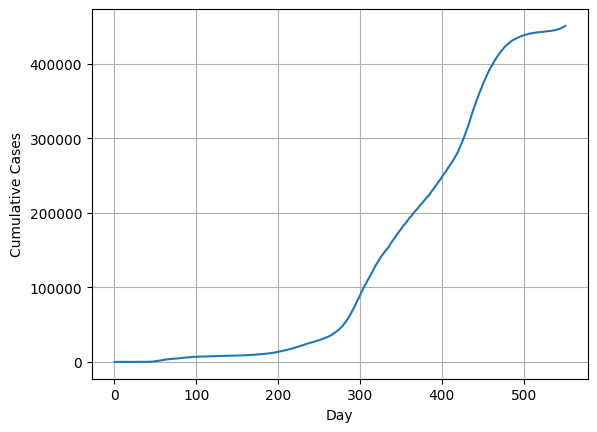

In [110]:
plt.plot(x, integral)
plt.xlabel('Day')
plt.ylabel('Cumulative Cases')
plt.grid()